                                              filename       MAE
317  eform_compact_dim_s250_initial_downstream_Neit...  0.308952
318  eform_compact_dim_s250_initial_downstream_Neit...  0.307942
319  eform_compact_dim_s250_initial_downstream_Neit...  0.329165
320  eform_compact_dim_s250_initial_downstream_Neit...  0.328177
321  eform_compact_dim_s250_initial_downstream_Neit...  0.330667
322  eform_compact_dim_s250_initial_downstream_Neit...  0.312210
323  eform_compact_dim_s250_initial_downstream_Neit...  0.325065
324  eform_compact_dim_s250_initial_downstream_Neit...  0.325347
325  eform_compact_dim_s250_initial_downstream_Neit...  0.301044
326  eform_compact_dim_s250_initial_downstream_Neit...  0.304379
327  eform_compact_dim_s250_initial_downstream_Neit...  0.332154
328  eform_compact_dim_s250_initial_downstream_Neit...  0.281809
[265    0.427454
266    0.442873
267    0.440887
268    0.463643
269    0.449778
270    0.456582
271    0.453696
272    0.402963
273    0.421131
274    0.4

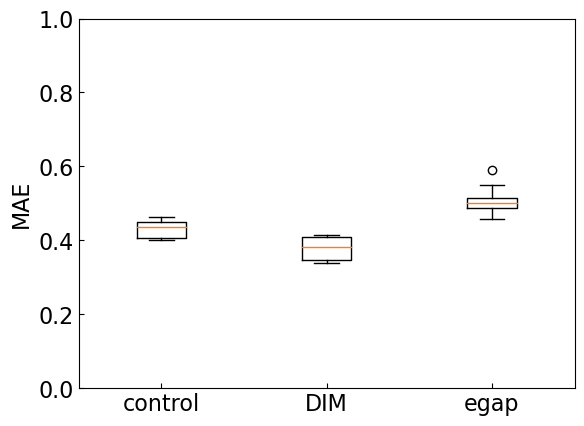

[317    0.308952
318    0.307942
319    0.329165
320    0.328177
321    0.330667
322    0.312210
323    0.325065
324    0.325347
325    0.301044
326    0.304379
327    0.332154
328    0.281809
Name: MAE, dtype: float64, 286    0.326156
287    0.318401
288    0.298494
289    0.324569
290    0.330291
291    0.314128
292    0.274809
293    0.322947
294    0.308217
295    0.326471
296    0.293212
297    0.303291
Name: MAE, dtype: float64, Series([], Name: MAE, dtype: float64)]


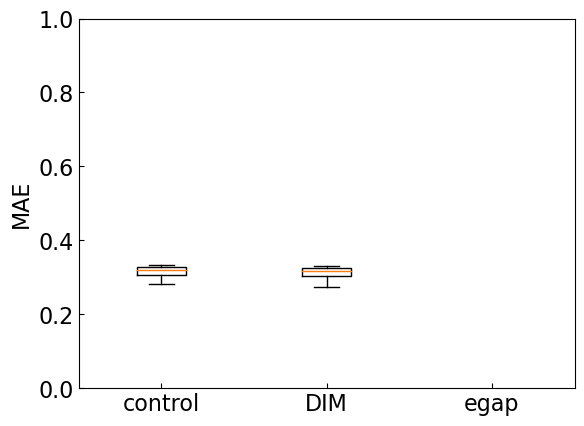

[202    0.192681
203    0.191928
204    0.191501
205    0.204442
206    0.192081
207    0.173278
208    0.185457
209    0.207243
210    0.181743
211    0.191246
212    0.187988
Name: MAE, dtype: float64, 178    0.212715
179    0.211045
180    0.219766
181    0.202863
182    0.196609
183    0.225650
184    0.209479
185    0.207533
186    0.198034
187    0.192003
Name: MAE, dtype: float64, 188    0.221575
189    0.230287
190    0.243199
191    0.230723
192    0.227804
193    0.269831
194    0.232204
195    0.246789
196    0.242898
197    0.252890
198    0.238846
199    0.230309
Name: MAE, dtype: float64]


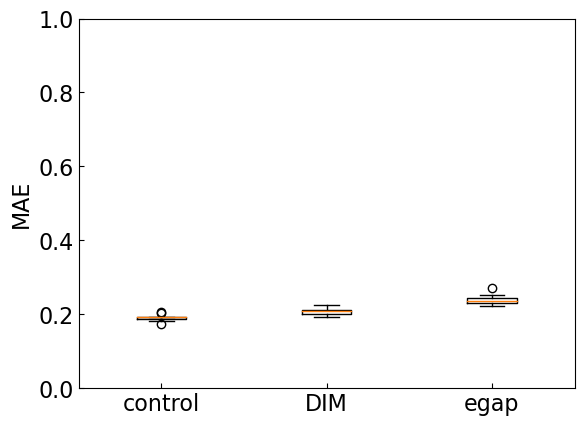

[173    0.300203
Name: MAE, dtype: float64, 169    0.20613
Name: MAE, dtype: float64, Series([], Name: MAE, dtype: float64)]


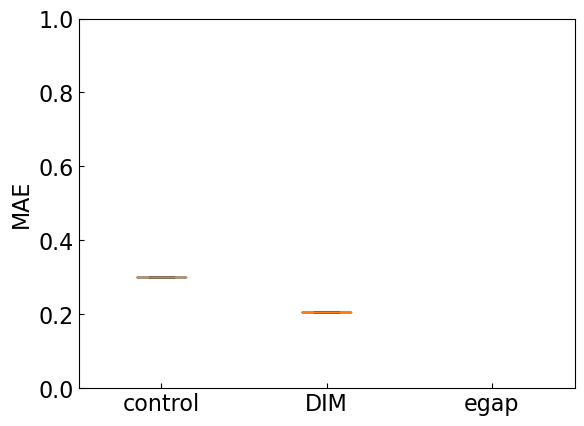

In [4]:
import pandas as pd
import matplotlib.pyplot as plt      
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import matplotlib

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

font = {'size'   : 16}

matplotlib.rc('font', **font)

DownMAE = pd.read_csv("Downstream_MAEs.csv",header=None,names=["filename","MAE"])
print(DownMAE[DownMAE["filename"].str.contains("eform_compact_dim_s250_initial_downstream_Neither")])

box_plot_1 = [["eform_compact_dim_s100_initial_downstream_Neither_", "eform_compact_dim_s100_DIM_downstream_Neither_DIM_eform_", "eform_compact_dim_s100_DIM_downstream_Neither_Supervised_egap_"],["control","DIM","egap"],"eform_s100_transfer.png",[0.0,1.0]]
box_plot_2 = [["eform_compact_dim_s250_initial_downstream_Neither_","eform_compact_dim_s250_DIM_downstream_Neither_DIM_eform_","eform_compact_dim_s250_DIM_downstream_Neither_Supervised_eform_"],["control","DIM","egap"],"eform_s250_transfer.png",[0.0,1.0]]
box_plot_3 = [["eform_compact_dim_s1000_initial_downstream_Neither_", "eform_compact_dim_s1000_DIM_downstream_Neither_DIM_eform_", "eform_compact_dim_s1000_DIM_downstream_Neither_Supervised_egap_"],["control","DIM","egap"],"eform_s1000_transfer.png",[0.0,1.0]]
box_plot_4 = [["eform_compact_dim_s10000_initial_downstream_Both_", "eform_compact_dim_s10000_DIM_downstream_Both_DIM_eform_", "eform_compact_dim_s10000_DIM_downstream_Both_Supervised_egap_"],["control","DIM","egap"],"eform_s10000_transfer.png",[0.0,1.0]]
box_plot_queue = [box_plot_1,box_plot_2,box_plot_3,box_plot_4]

for plots in box_plot_queue:
    plt.figure()
    vectors = [DownMAE[DownMAE["filename"].str.contains(i)]["MAE"] for i in plots[0]]
    print(vectors)
    plt.boxplot(vectors,labels=plots[1])
    plt.ylim(plots[3])
    plt.ylabel("MAE")
    plt.savefig(plots[2])
    plt.show()

['Initial_eform' 'nocomp_klnorm_moremultiloss_eform' 'Initial_egap'
 'nocomp_klnorm_moremultiloss_egap' 'klnorm_eform']


/tmp/ipykernel_231840/1261357936.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vectors1 = RepMAE[RepMAE["limit"] == limit][RepMAE["model"] == "Initial_eform"]
/tmp/ipykernel_231840/1261357936.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vectors2 = RepMAE[RepMAE["limit"] == limit][RepMAE["model"] == "nocomp_klnorm_moremultiloss_eform"]
/tmp/ipykernel_231840/1261357936.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vectors3 = FeatMAE[FeatMAE["limit"] == limit][FeatMAE["model"] == "eform_OrbitalFieldMatrix"]


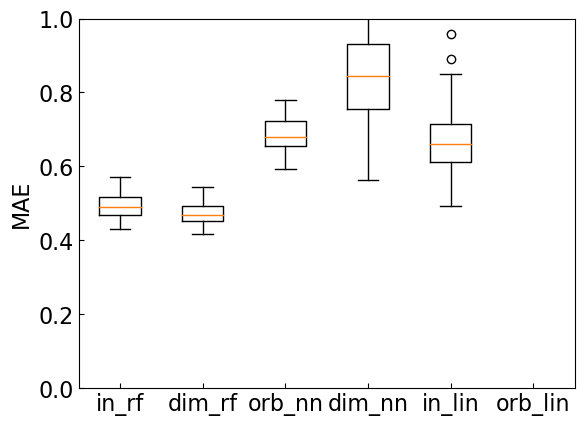

/tmp/ipykernel_231840/1261357936.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vectors1 = RepMAE[RepMAE["limit"] == limit][RepMAE["model"] == "Initial_eform"]
/tmp/ipykernel_231840/1261357936.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vectors2 = RepMAE[RepMAE["limit"] == limit][RepMAE["model"] == "nocomp_klnorm_moremultiloss_eform"]
/tmp/ipykernel_231840/1261357936.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vectors3 = FeatMAE[FeatMAE["limit"] == limit][FeatMAE["model"] == "eform_OrbitalFieldMatrix"]


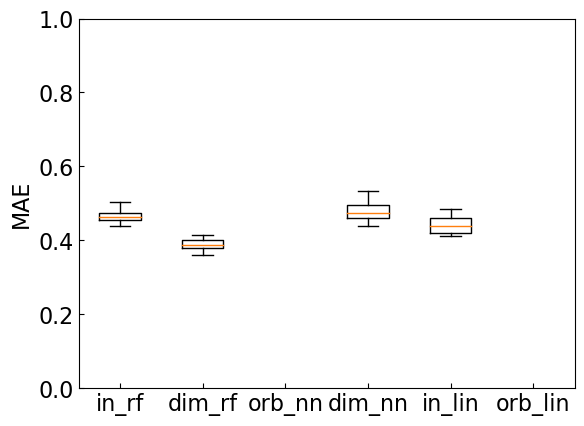

/tmp/ipykernel_231840/1261357936.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vectors1 = RepMAE[RepMAE["limit"] == limit][RepMAE["model"] == "Initial_eform"]
/tmp/ipykernel_231840/1261357936.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vectors2 = RepMAE[RepMAE["limit"] == limit][RepMAE["model"] == "nocomp_klnorm_moremultiloss_eform"]
/tmp/ipykernel_231840/1261357936.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vectors3 = FeatMAE[FeatMAE["limit"] == limit][FeatMAE["model"] == "eform_OrbitalFieldMatrix"]


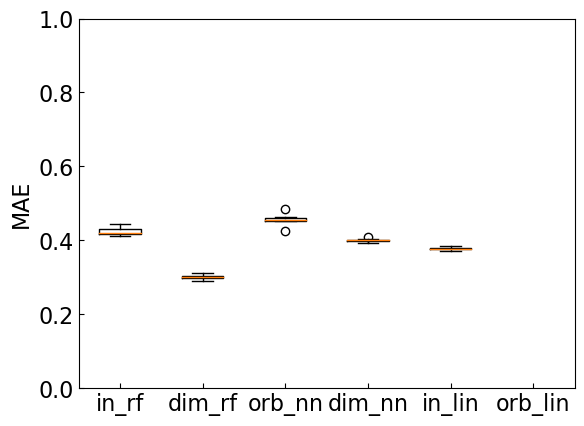

/tmp/ipykernel_231840/1261357936.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vectors1 = RepMAE[RepMAE["limit"] == limit][RepMAE["model"] == "Initial_eform"]
/tmp/ipykernel_231840/1261357936.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vectors2 = RepMAE[RepMAE["limit"] == limit][RepMAE["model"] == "nocomp_klnorm_moremultiloss_eform"]
/tmp/ipykernel_231840/1261357936.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vectors3 = FeatMAE[FeatMAE["limit"] == limit][FeatMAE["model"] == "eform_OrbitalFieldMatrix"]


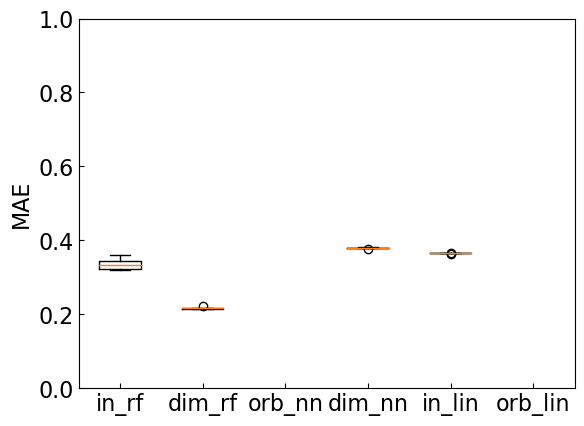

In [6]:
import pandas as pd
import matplotlib.pyplot as plt      
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import matplotlib

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

font = {'size'   : 16}

matplotlib.rc('font', **font)

RepMAE = pd.read_csv("Downstream_DIM.csv")
FeatMAE = pd.read_csv("Downstream_Featurized.csv")
print(RepMAE["model"].unique())

for limit in [100,250,1000,10000]:
    plt.figure()
    vectors1 = RepMAE[RepMAE["limit"] == limit][RepMAE["model"] == "Initial_eform"]
    vectors2 = RepMAE[RepMAE["limit"] == limit][RepMAE["model"] == "nocomp_klnorm_moremultiloss_eform"]
    vectors3 = FeatMAE[FeatMAE["limit"] == limit][FeatMAE["model"] == "eform_OrbitalFieldMatrix"]
    plt.boxplot([vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors1["lin_MAE"],vectors2["lin_MAE"],vectors3["lin_MAE"]],labels = ["in_rf","dim_rf","orb_nn","dim_nn","in_lin","orb_lin"])
    plt.ylim(0,1)
    plt.ylabel("MAE")
    plt.show()